# Instituto de Educação Superior de Brası́lia – IESB
## Pós-Graduação em Inteligência Artificial
### Deep Learning e Redes Neurais

### Atividade 2 - Classificação de imagens na base de dados CIFAR-10 com CNN e Data Augmentation

#### Descrição do Dataset CIFAR-10

O dataset CIFAR-10 consiste de 60 mil imagens coloridas, com 10 classes distintas igualmente balanceadas (isto é, 6 mil imagens por classe).

O conjunto é separado em 50 mil imagens para treinamento e 10 mil para teste.

As imagens são de animais e objetos, com as seguintes classes:


  - 0 - Avião										
  - 1 - Automóvel
  - 2 - Pássaro
  - 3 - Gato
  - 4 - Cervo
  - 5 - Cachorro
  - 6 - Sapo
  - 7 - Cavalo
  - 8 - Barco
  - 9 - Caminhão

Fonte: https://www.cs.toronto.edu/~kriz/cifar.html

# Parte A

## 1) Dataset

 - Carregue o dataset.
```python
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

 - Escolha, aletoriamente (e de forma automatizada), 16 imagens na base de treino, e apresente-as visualmente em um gráfico 4x4 (subplot).
 
 
 - Verifique se as dimensões dos tensores estão de acordo com a descrição do dataset.


 - Realize, caso necessário, pré-processamento nos dados. (Ex: normalização, padronização, codificação de classes, etc).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [2]:
import os
os.cpu_count()

2

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


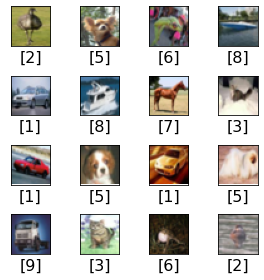

In [3]:
N = 16

idxs = np.random.randint(low=0, high=len(X_train), size=N)

plt.figure(figsize=(4, 4))
for (i, idx) in enumerate(idxs):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[idx])
    plt.xlabel(y_train[idx], fontsize = 16)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## 2) Implementação do Modelo CNN

### 2.1 Arquitetura

 - Defina uma função que implemente uma arquitera de Rede Convolucional (utilizando o Keras) e retorne um objeto desse seu modelo.
 
 
 - A escolha de parâmetros do modelo, como, por exemplo, *quantidade de camadas convolucionais*, *quantidade de filtros em cada cada camada convolucional*, *quantidade de camadas densas*,  *funções de ativação*, fica a critério do projetista. 


 - Instancie um modelo usando a função implementada, e apresente um resumo da arquitetura.

In [4]:
y_train = np.squeeze(y_train)

In [5]:
def create_CNN(input_shape):
    
       # Limpar kernel do Keras
    backend.clear_session()
    
    # Instanciando modelo no keras (API Sequential)
    model = Sequential()

    # Entrada
    model.add(InputLayer(input_shape=input_shape))

    # 1a Camada Convolucional
    model.add(
        Conv2D(
          filters=6,
          kernel_size=(5, 5),
          strides=(1, 1),
          padding='same',
          activation='relu',
        )
    )
    model.add(
        MaxPooling2D((2, 2)))
    
    #model.add(Dropout(0.2))

    # 2a Camada Convolucional
    model.add(
        Conv2D(64, (3, 3), activation='relu'))
    
    model.add(
        MaxPooling2D((2, 2)))
    
     # 3a Camada Convolucional
    model.add(
        Conv2D(64, (3, 3), activation='relu'))
    
    model.add(
        MaxPooling2D((2, 2)))
    
    model.add(Dropout(0.2))

    
    model.add(Flatten())

    # Camadas ocultas
    model.add(Dense(units=200, activation='relu', name='Camada_Oculta_1'))
    model.add(Dropout(0.2))

    model.add(Dense(units=100, activation='relu', name='Camada_Oculta_2'))
    model.add(Dropout(0.2))

    
    model.add(Dense(units=10, activation='softmax', name='Saida'))
    
    return model
    
    

### 2.2 Compilação

 - Baseado no problema descrito, defina a função custo que será otimizada, e qual otimizador será utilizado.
 
 
 - Defina também quais métricas serão avaliadas pelo modelo durante a etapa de treinamento e de validação.

### 2.3 Treinamento e Validação 
 
 - Defina a quantidade máxima de épocas para o treinamento.
 
 
 - Utilize alguma rotina de *callback* para que o treinamento não dure o máximo de épocas definido, caso isso não seja necessário.


 - Utilize 20% da base de treino para validar o modelo a cada época.  <br>


 - Mostre em um gráfico o comportamento da função custo (*loss*) e da acurácia, ao longo das epócas, para as bases de treino e de validação.

In [6]:
model = create_CNN(input_shape=X_train[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        3520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0

In [7]:

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [8]:
MAX_EPOCHS=40
PATIENCE = int(0.1*MAX_EPOCHS)
TOL = 1e-3
BATCH_SIZE=2400

# Funções de Callbacks
es = EarlyStopping(
    monitor='val_loss',
    min_delta=TOL,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True,
)

mc = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    
)
cb = [es, mc]

hist = model.fit(
    x=X_train, y=y_train,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    epochs=MAX_EPOCHS,
    callbacks=cb,
    workers=2,
    verbose=1,
)

Epoch 1/40
17/17 [==============================] - 5s 89ms/step - loss: 7.1150 - accuracy: 0.1038 - val_loss: 2.2950 - val_accuracy: 0.1191

Epoch 00001: saving model to best_model.h5
Epoch 2/40
17/17 [==============================] - 1s 40ms/step - loss: 2.2829 - accuracy: 0.1181 - val_loss: 2.2167 - val_accuracy: 0.1688

Epoch 00002: saving model to best_model.h5
Epoch 3/40
17/17 [==============================] - 1s 40ms/step - loss: 2.1786 - accuracy: 0.1819 - val_loss: 2.0470 - val_accuracy: 0.2275

Epoch 00003: saving model to best_model.h5
Epoch 4/40
17/17 [==============================] - 1s 40ms/step - loss: 2.0772 - accuracy: 0.2171 - val_loss: 1.9620 - val_accuracy: 0.2661

Epoch 00004: saving model to best_model.h5
Epoch 5/40
17/17 [==============================] - 1s 40ms/step - loss: 2.0065 - accuracy: 0.2423 - val_loss: 1.8989 - val_accuracy: 0.3048

Epoch 00005: saving model to best_model.h5
Epoch 6/40
17/17 [==============================] - 1s 40ms/step - loss: 1.

In [9]:
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### 2.4 Desempenho na Base de Teste

 - Realize, com o modelo treinado, predições na base de teste (método *predict*).
 

 - Com as predições, calcule a precisão e a revocação para cada classe.  <br>
   (Pode ser utilizada a função *classification_report* do *scikit-learn* ou alguma outra similar).

In [10]:

y_pred = np.argmax(model.predict(X_test),1)



In [11]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [12]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.61      0.52      0.56      1000
           1       0.68      0.64      0.66      1000
           2       0.46      0.35      0.40      1000
           3       0.36      0.34      0.35      1000
           4       0.49      0.46      0.47      1000
           5       0.46      0.49      0.47      1000
           6       0.61      0.70      0.65      1000
           7       0.59      0.61      0.60      1000
           8       0.61      0.66      0.63      1000
           9       0.54      0.67      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



In [13]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print()
print(' >> Train:')
print(f'    Loss:     {train_loss}')
print(f'    Accuracy: {train_acc}')
print()
print(' >> Test:')
print(f'    Loss:     {test_loss}')
print(f'    Accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 1.2822 - accuracy: 0.5424

 >> Train:
    Loss:     1.1668206453323364
    Accuracy: 0.5931800007820129

 >> Test:
    Loss:     1.2821576595306396
    Accuracy: 0.5424000024795532


# Parte B: Data Augmentation

## 1) Recarregue o Dataset CIFAR-10


 - Recarregue o dataset CIFAR-10, conforme feito na parte A, porém sem realizar pré-processamentos.


 - Utilize a classe **ImageDataGenerator** do Keras para fazer os pré-processamentos adequados, e aplicar as transformações nas imagens, de forma a gerar novos exemplos para o treinamento (*data augmentation*). A escolha das transformações é livre ao projetista.


 - Mostre em um gráfico 4x4 (subplot), 16 exemplos aleatórios dessas imagens transformadas, com seus respectivos rótulos.


 - Configure 20% dos dados para validação. Isso deve ser feito durante o instanciamento do objeto que irá manipular o dataset.
 
 
 - Obs: Aplique as transformações apenas no conjunto de treino retornado pela função *cifar10.load_data()*. No conjunto de teste, apenas os pré-processamentos devem ser utilizados (não utilize *data augmentation* nessa base)

In [14]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = np.squeeze(y_train)
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split
train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=64,
    subset='training') # set as training data

validation_generator = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=64,
    subset='validation') # set as validation data

data = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=25,
    shuffle=False,
    seed=1,
)

(25, 32, 32, 3) (25,)


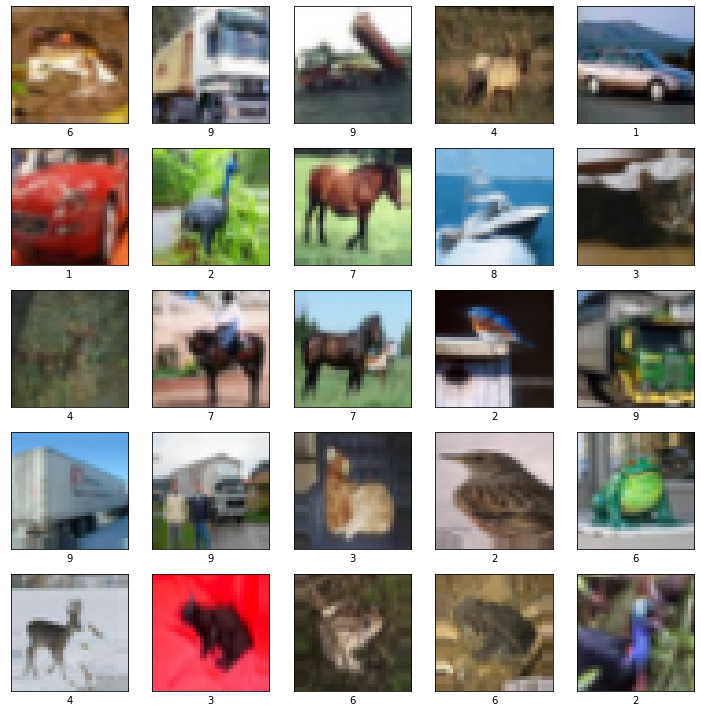

In [15]:
imgs, labels = data.next()

print(imgs.shape, labels.shape)

plt.figure(figsize=(10, 10))
for i in range(25):
    batch = data.next()
    
    plt.subplot(5, 5, i+1)
    plt.imshow(imgs[i])
    plt.xlabel(labels[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

## 2) Retreine o seu modelo

### 2.1 Compilação e Treinamento

 - Utilizando a mesma função definida na parte A, instancie um novo modelo.
 
 
 - Com os mesmos critérios, treine esse novo modelo utilizando para treino e validação os objetos definidos pelo *ImageDataGenerator*.
 
 
 - Mostre em um gráfico o comportamento da função custo (loss) e da acurácia, ao longo das epócas, para as bases de treino e de validação.


### 2.2 Desempenho na Base de Teste

 - Após o término do treinamento, calcule as mesmas métricas de desempenho descritas na parte A para a base de teste.


 - Houve melhora no desempenho?

In [16]:
model2 = create_CNN(input_shape=X_train.shape[1:])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        3520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0

In [17]:
from tensorflow.keras.optimizers import Adam, RMSprop
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [18]:
#optimizer=RMSprop(learning_rate=0.001,decay=1e-6)

In [19]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [20]:
MAX_EPOCHS=40
PATIENCE = int(0.1*MAX_EPOCHS)
TOL = 1e-3
BATCH_SIZE=4800

# Funções de Callbacks
es2 = EarlyStopping(
    monitor='val_loss',
    min_delta=TOL,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True,
)

mc2 = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    
)
cb2 = [mc2, es2]

# Ajuste do modelo na base treino
model2.fit(train_generator,
         validation_data=validation_generator,
          epochs=MAX_EPOCHS, 
    #callbacks=[LearningRateScheduler(lr_schedule)],
    workers=2,
    verbose=1,)

Epoch 1/40
625/625 [==============================] - 30s 47ms/step - loss: 1.8451 - accuracy: 0.3104 - val_loss: 1.5876 - val_accuracy: 0.4249
Epoch 2/40
625/625 [==============================] - 28s 45ms/step - loss: 1.5729 - accuracy: 0.4269 - val_loss: 1.4282 - val_accuracy: 0.4916
Epoch 3/40
625/625 [==============================] - 29s 47ms/step - loss: 1.4603 - accuracy: 0.4733 - val_loss: 1.3171 - val_accuracy: 0.5291
Epoch 4/40
625/625 [==============================] - 30s 48ms/step - loss: 1.3841 - accuracy: 0.5057 - val_loss: 1.3087 - val_accuracy: 0.5282
Epoch 5/40
625/625 [==============================] - 27s 43ms/step - loss: 1.3228 - accuracy: 0.5288 - val_loss: 1.2425 - val_accuracy: 0.5613
Epoch 6/40
625/625 [==============================] - 29s 46ms/step - loss: 1.2834 - accuracy: 0.5442 - val_loss: 1.1721 - val_accuracy: 0.5891
Epoch 7/40
625/625 [==============================] - 28s 45ms/step - loss: 1.2403 - accuracy: 0.5659 - val_loss: 1.1754 - val_accuracy:

In [21]:
y_pred = np.argmax(model2.predict(X_test),1)



In [22]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.27      0.81      0.40      1000
           1       0.53      0.66      0.59      1000
           2       0.60      0.15      0.24      1000
           3       0.47      0.04      0.07      1000
           4       0.88      0.02      0.04      1000
           5       0.47      0.40      0.43      1000
           6       0.75      0.09      0.15      1000
           7       0.35      0.85      0.50      1000
           8       0.48      0.38      0.42      1000
           9       0.53      0.64      0.58      1000

    accuracy                           0.40     10000
   macro avg       0.53      0.40      0.34     10000
weighted avg       0.53      0.40      0.34     10000



In [23]:
train_loss, train_acc = model2.evaluate(X_train, y_train)
test_loss, test_acc = model2.evaluate(X_test, y_test)

print()
print(' >> Train:')
print(f'    Loss:     {train_loss}')
print(f'    Accuracy: {train_acc}')
print()
print(' >> Test:')
print(f'    Loss:     {test_loss}')
print(f'    Accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 135.5570 - accuracy: 0.4033

 >> Train:
    Loss:     127.53707122802734
    Accuracy: 0.4140399992465973

 >> Test:
    Loss:     135.55699157714844
    Accuracy: 0.4032999873161316
